# Time Series Analysis - U.S. Beer, Wine, and Liquor Sales

Following code is part of an assignment for the course IMSE 586 - Big Data Analytics and Visualization at the University of Michigan at Dearborn.

Download the U.S. monthly total beer, wine, and liquor sales data from the following link: https://www.census.gov/econ/currentdata/dbsearch?program=MRTS&startYear=1992&endYear=2019&categories=4453&dataType=SM&geoLevel=US&notAdjusted=1&submit=GET+DATA&releaseScheduleId=

You can download the CSV file by simply clicking the 'TXT' link on the webpage. Note: Do NOT make any changes to the data selection settings on the webpage.

Read the descriptions of the dataset on the webpage. 

For all plots, make sure to choose a suitable aspect ratio of your figure (e.g., 15-by-5), include important elements (e.g., x & y labels, title) and make sure the plot is easy to read (e.g., larger fonts).

1. Try to read the data into a pandas dataframe. You may get an error. Open the CSV file in Excel or the like to take a look at the raw data. Do NOT make any modifications to the CSV file. Instead, check the documentation of the pandas `read_csv` function to see how you can import the data properly by setting one argument of the function. Print the first few rows of the dataframe. 


2. Do the normal checking. See if the dataframe contains any null values. Drop any records with null values. Print the last few rows of the dataframe. 


3. Convert the month and year in the *Period* column to a pandas datetime format, and set it as the index of the dataframe. Then drop the *Period* column. Print the first few rows of the dataframe. 


4. Make a line plot of the monthly sales. In the same figure, add another line that shows the 12-month moving average of the sales (the rolling window should NOT be centered). Add legend of the two lines. Hint: You can name a line by passing a label to the plot function argument called `label`.


5. Make a line plot that shows the total sales for a 3-month rolling window. For example, the value for May-92 should be the total sales for Mar-92, Apr-92, and May-92. Add legend of the two lines.


6. Transform the data to stabilize the variance in the sales data. Save the transformed data in a new column and plot it. 


7. Remove the trend of the data that you got from Q6. Save the detrended data in a new column and plot it. 


8. Adjust for seasonality based on the data from Q7 . Save the data in a new column and plot it. 


9. Based on the result from Q8, make a scatter plot of the $y_t$ vs $y_{t-1}$. What is the correlation coefficient for the autocorrelation with a lag of 1? 


10. Simiar to Q9, make a scatter plot of the $y_t$ vs $y_{t-2}$. What is the correlation coefficient for the autocorrelation with a lag of 2? 


11. **No need to answer this question**. If you want more exercises on the custom function of the rolling window, try to make a line plot that shows the difference between the highest and lowest sales for a 6-month rolling window.

12. Use your work from above to create the stationary data for the sales (i.e., the results from Q8).   


13. Create the autocorrelation function (ACF) plot and partial autocorrelation function (PACF) plot. 


14. Use the last 12-month's data as the test set, and the remaining data as the training set. Build an AR($p$)  model and let the algorithm choose the order $p$. Print the value of the chosen order $p$ and all the coefficients in the model.


15. Use the AR model in Q14 to make predictions of the months in the test set. Create a line plot that shows a comparison of the predicted values and the actual (stationary) values. Add a legend to the plot so it's clear which line is which. 


16. Convert the predicted (stationary) values back to the numbers in the original measure. Create a line plot that shows a comparison of the predicted values and the actual sales values. You may choose to add more historical data of the actual sales in the plot. Add a legend to the plot. What is the forecasting error in terms of RMSE?


17. Now use the same training set to build an ARMA model with $p=3$ and $q=3$. Print the coefficients in the model. 


18. Use the AR model in Q6 to make predictions of the months in the test set. Create a line plot that shows a comparison of the predicted values and the actual (stationary) values. Add a legend to the plot.


19. Convert the predicted (stationary) values back to the numbers in the original measure. Create a line plot that shows a comparison of the predicted values and the actual sales values. You may choose to add more historical data of the actual sales in the plot. Add a legend to the plot. What is the forecasting error in terms of RMSE?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Try to read the data into a pandas dataframe. You may get an error. Open the CSV file in Excel or the like to take a look at the raw data. Do NOT make any modifications to the CSV file. Instead, check the documentation of the pandas `read_csv` function to see how you can import the data properly by setting one argument of the function. Print the first few rows of the dataframe. 

In [6]:
# read in data
df = pd.read_csv('SeriesReport.csv', header = 6)

# alternatively, we can set the 'skiprows'
# df = pd.read_csv('SeriesReport.csv', skiprows = 6)

df.head()

,Period,Value
0,Jan-1992,1509
1,Feb-1992,1541
2,Mar-1992,1597
3,Apr-1992,1675
4,May-1992,1822


### 2. Do the normal checking. See if the dataframe contains any null values. Drop any records with null values. Print the last few rows of the dataframe.

In [7]:
df.dtypes

Period    object
Value      int64
dtype: object

In [8]:
df.isnull().sum()

Period    0
Value     0
dtype: int64

In [9]:
# drop rows with null values
df.dropna(inplace = True)
df.tail()

,Period,Value
331,Aug-2019,5270
332,Sep-2019,4680
333,Oct-2019,4913
334,Nov-2019,5312
335,Dec-2019,6630


### 3. Convert the month and year in the *Period* column to a pandas datetime format, and set it as the index of the dataframe. Then drop the *Period* column. Print the first few rows of the dataframe. 

In [10]:
df['date'] = pd.to_datetime(df.Period, format = '%b-%Y')

df.set_index('date', inplace = True)

df.drop('Period', axis = 1, inplace = True)

df.head()

,Value
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


### 4. Make a line plot of the monthly sales. In the same figure, add another line that shows the 12-month moving average of the sales (the rolling window should NOT be centered). Add legend of the two lines. 

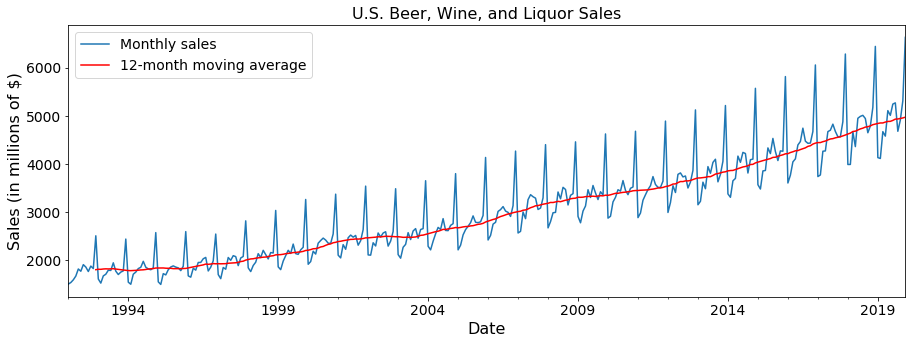

In [11]:
plt.figure(figsize = (15, 5))

df.Value.plot(label='Monthly sales')

df.Value.rolling(12).mean().plot(label='12-month moving average', color = 'red')

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Sales (in millions of $)', fontsize = 16)
plt.title('U.S. Beer, Wine, and Liquor Sales', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)

plt.show()

### 5. Make a line plot that shows the total sales for a 3-month rolling window. For example, the value for May-92 should be the total sales for Mar-92, Apr-92, and May-92. Add legend of the two lines.

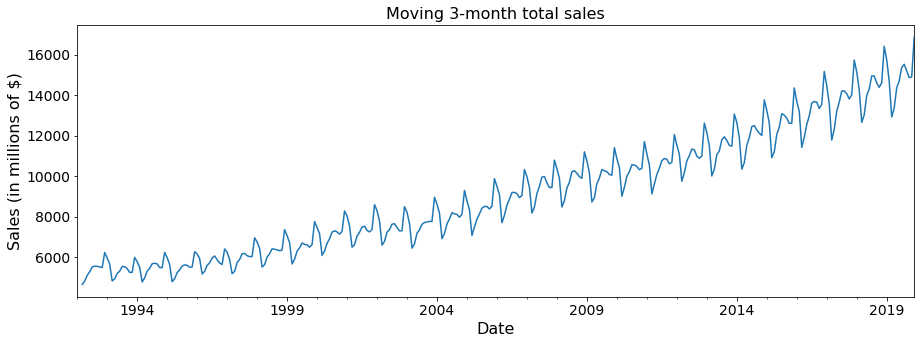

In [12]:
plt.figure(figsize = (15, 5))

df.Value.rolling(3).sum().plot()

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Sales (in millions of $)', fontsize = 16)
plt.title('Moving 3-month total sales', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### 6. Transform the data to stabilize the variance in the sales data. Save the transformed data in a new column and plot it. 

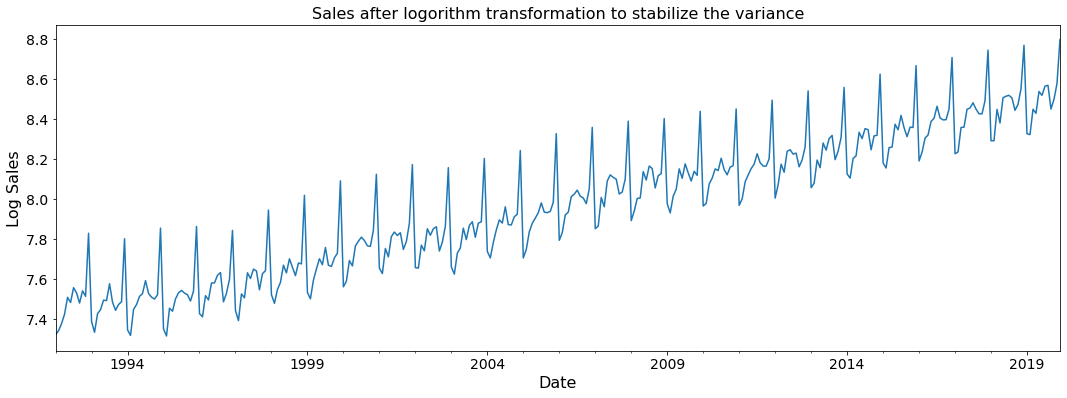

In [13]:
plt.figure(figsize = (18, 6))

df['log_sales'] = np.log(df.Value)

df.log_sales.plot()

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Log Sales', fontsize = 16)
plt.title('Sales after logorithm transformation to stabilize the variance', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### 7. Remove the trend of the data that you got from Q6. Save the detrended data in a new column and plot it. 

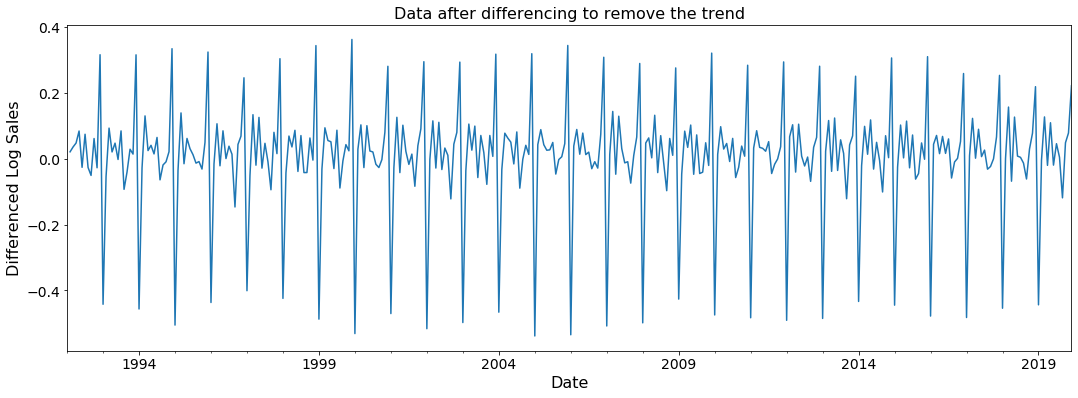

In [14]:
plt.figure(figsize = (18, 6))

df['log_sales_diff'] = df.log_sales.diff(1)

df.log_sales_diff.plot()

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Differenced Log Sales', fontsize = 16)
plt.title('Data after differencing to remove the trend', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### 8. Adjust for seasonality based on the data from Q7 . Save the data in a new column and plot it.

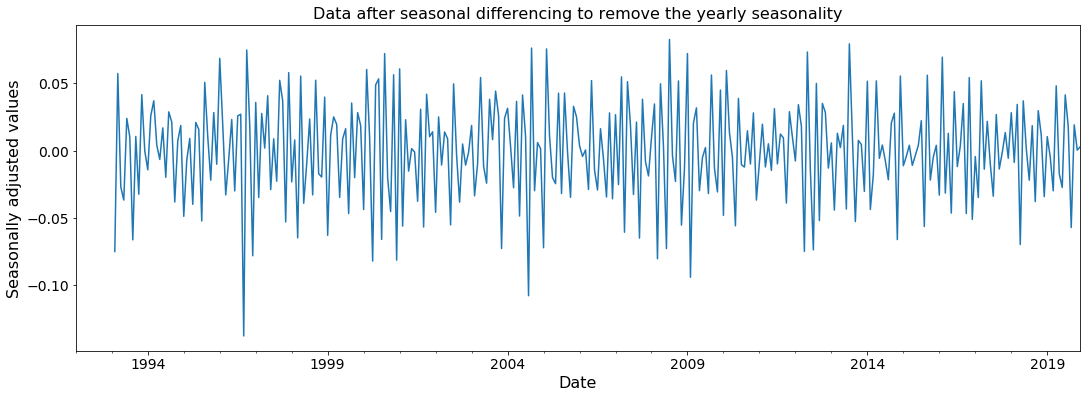

In [15]:
plt.figure(figsize = (18, 6))

df['stationary'] = df.log_sales_diff.diff(periods = 12)

df.stationary.plot()

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Seasonally adjusted values', fontsize = 16)
plt.title('Data after seasonal differencing to remove the yearly seasonality', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### 9. Based on the result from Q8, make a scatter plot of the $y_t$ vs $y_{t-1}$. What is the correlation coefficient for the autocorrelation with a lag of 1? 

The colleration coefficient for the autocorrelation with a lag of 1 is -0.55


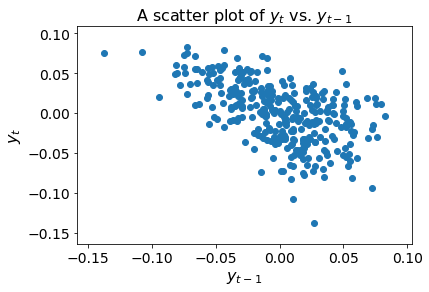

In [16]:
df['shift_1'] = df.stationary.shift(1)

# df[['stationary', 'shift_1']]. head(20)  # you can double-check if it did the job

plt.scatter(df.shift_1, df.stationary)

# alternatively, you can use the pandas lag_plot function
# pd.plotting.lag_plot(df.stationary, lag = 1)

cor = df.stationary.corr(df.shift_1)

print('The colleration coefficient for the autocorrelation with a lag of 1 is', cor.round(2))

plt.xlabel('$y_{t-1}$', fontsize = 16)
plt.ylabel('$y_t$', fontsize = 16)
plt.title('A scatter plot of $y_t$ vs. $y_{t-1}$', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### 10. Simiar to Q9, make a scatter plot of the $y_t$ vs $y_{t-2}$. What is the correlation coefficient for the autocorrelation with a lag of 2? 

The colleration coefficient for the autocorrelation with a lag of 1 is -0.02


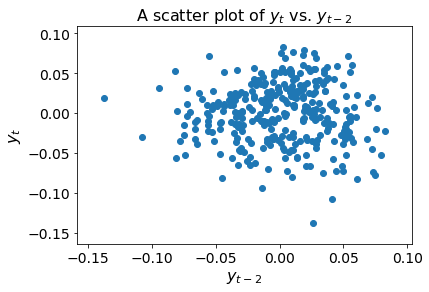

In [17]:
df['shift_2'] = df.stationary.shift(2)

# df[['stationary', 'shift_2']]. head(20)

plt.scatter(df.shift_2, df.stationary)

# alternatively, you can use the pandas lag_plot function
# pd.plotting.lag_plot(df.stationary, lag = 2)

cor = df.stationary.corr(df.shift_2)

print('The colleration coefficient for the autocorrelation with a lag of 1 is', cor.round(2))

plt.xlabel('$y_{t-2}$', fontsize = 16)
plt.ylabel('$y_t$', fontsize = 16)
plt.title('A scatter plot of $y_t$ vs. $y_{t-2}$', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

### 11. **No need to answer this question**. If you want more exercises on the custom function of the rolling window, try to make a line plot that shows the difference between the highest and lowest sales for a 6-month rolling window.

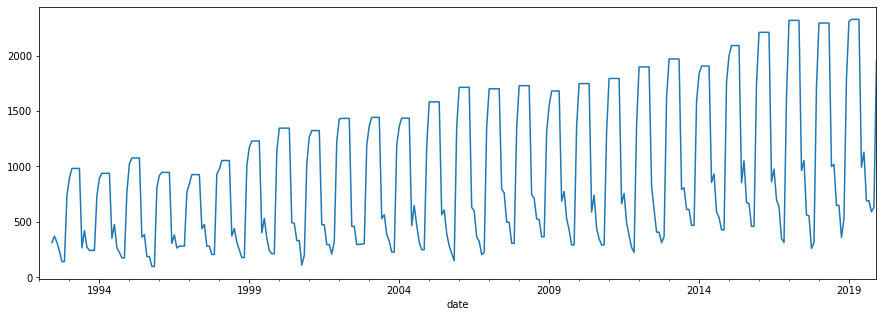

In [18]:
plt.figure(figsize = (15, 5))

# We can easily write a lambda function for that
df.Value.rolling(6).apply(lambda x: max(x) - min(x)).plot()

plt.show()

### 12. Use your work from above to create the stationary data for the sales (i.e., the results from Q8).

In [20]:
df['log_sales'] = np.log(df.Value)

df['log_sales_diff'] = df.log_sales.diff(1)

df['stationary'] = df.log_sales_diff.diff(periods = 12)

### 13. Create the autocorrelation function (ACF) plot and partial autocorrelation function (PACF) plot. 

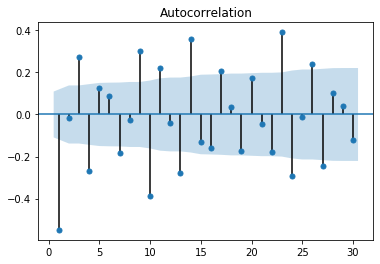

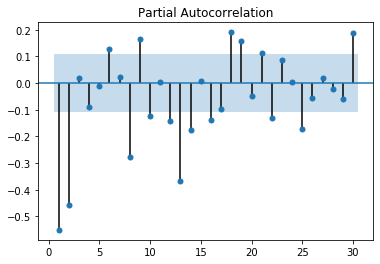

In [22]:
import statsmodels.api as sm

df.stationary.dropna(inplace = True)  # drop the null values caused by differencing

sm.graphics.tsa.plot_acf(df.stationary, lags = 30, zero = False)

sm.graphics.tsa.plot_pacf(df.stationary, lags = 30, zero = False)

plt.show()

### 14. Use the last 12-month's data as the test set, and the remaining data as the training set. Build an AR($p$)  model and let the algorithm choose the order $p$. Print the value of the chosen order $p$ and all the coefficients in the model.

In [23]:
from statsmodels.tsa.ar_model import AR

X = df.dropna()

# use the last 12 month as the test set
t = -12
train = X[:t]
test = X[t:]

model = AR(train.stationary, freq = 'MS')

model_fitted = model.fit()

print('The chosen order p for the AR model is ' + str(model_fitted.k_ar) + '.')
print('')
print('The model coefficients are:')
print(model_fitted.params)

The chosen order p for the AR model is 16.

The model coefficients are:
const             0.000602
L1.stationary    -0.849847
L2.stationary    -0.595216
L3.stationary    -0.258543
L4.stationary    -0.236459
L5.stationary    -0.060453
L6.stationary    -0.123984
L7.stationary    -0.142047
L8.stationary    -0.236614
L9.stationary     0.006460
L10.stationary   -0.220949
L11.stationary   -0.264271
L12.stationary   -0.489658
L13.stationary   -0.502666
L14.stationary   -0.252916
L15.stationary   -0.114837
L16.stationary   -0.148772
dtype: float64


/Users/abhijitpadhi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Fut

### 15. Use the AR model in Q14 to make predictions of the months in the test set. Create a line plot that shows a comparison of the predicted values and the actual (stationary) values. Add a legend to the plot so it's clear which line is which. 

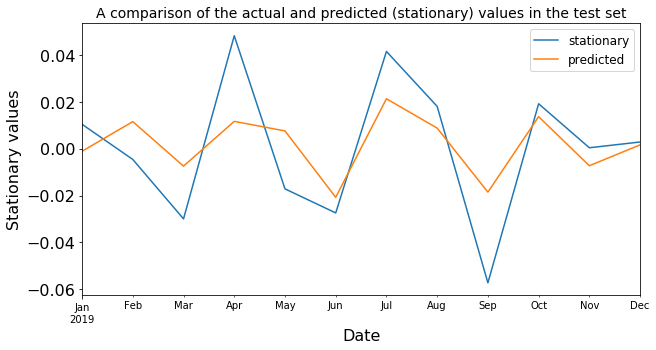

In [24]:
predictions = model_fitted.predict(start = len(train), end = len(X) - 1)

predicted = pd.Series(predictions, index = df[t:].index, name = 'predicted')

plt.figure(figsize = (10, 5))

test.stationary.plot()

predicted.plot()

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Stationary values', fontsize = 16)
plt.title('A comparison of the actual and predicted (stationary) values in the test set', fontsize = 14)

plt.yticks(fontsize = 16)

plt.legend(fontsize = 12)

plt.show()


### 16. Convert the predicted (stationary) values back to the numbers in the original measure. Create a line plot that shows a comparison of the predicted values and the actual sales values. You may choose to add more historical data of the actual sales in the plot. Add a legend to the plot. What is the forecasting error in terms of RMSE?

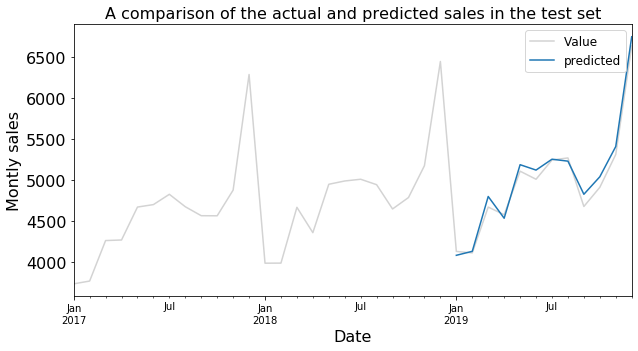

In [25]:
pred = [np.exp(predicted[0]) * train.Value[-1] * train.Value[-12] / train.Value[-13]]

for i in range(1, 12):   
    pred.append(np.exp(predicted[i]) * pred[-1] * train.Value[i-12] / train.Value[i-13])
    
pred_final = pd.Series(pred, index = df[t:].index, name = 'predicted')

pd.concat([test.Value, pred_final.round(1)], axis = 1)

plt.figure(figsize = (10, 5))

df.Value[-36:].plot(color = 'lightgray')

pred_final.plot()

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Montly sales', fontsize = 16)
plt.title('A comparison of the actual and predicted sales in the test set', fontsize = 16)

plt.yticks(fontsize = 16)

plt.legend(fontsize = 12)

plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(pred_final, df.Value[t:]))

print('The RMSE is ' + str(RMSE.round(1)) + '.')

The RMSE is 92.1.


### 17. Now use the same training set to build an ARMA model with $p=3$ and $q=3$. Print the coefficients in the model. 

In [27]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train.stationary, freq = 'MS', order = (3, 3))
model_fitted = model.fit()

print('The model coefficients are:')
print(model_fitted.params)

The model coefficients are:
const               0.000066
ar.L1.stationary   -1.205477
ar.L2.stationary   -1.049970
ar.L3.stationary   -0.056369
ma.L1.stationary    0.531887
ma.L2.stationary    0.424258
ma.L3.stationary   -0.538089
dtype: float64


### 18. Use the AR model in Q6 to make predictions of the months in the test set. Create a line plot that shows a comparison of the predicted values and the actual (stationary) values. Add a legend to the plot.

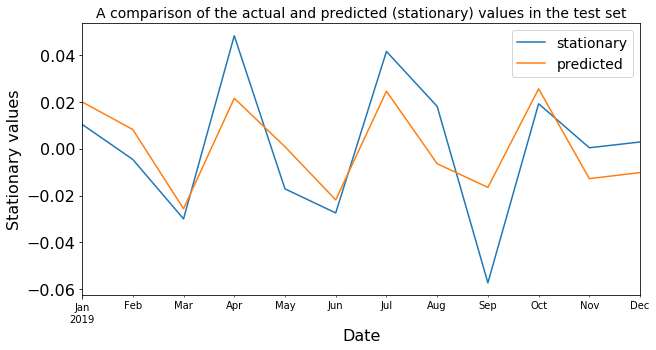

In [28]:
predictions = model_fitted.predict(start = len(train), end = len(X) - 1)

predicted = pd.Series(predictions, index = df[t:].index, name = 'predicted')

plt.figure(figsize = (10, 5))

test.stationary.plot()

predicted.plot()

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Stationary values', fontsize = 16)
plt.title('A comparison of the actual and predicted (stationary) values in the test set', fontsize = 14)

plt.yticks(fontsize = 16)

plt.legend(fontsize = 14)

plt.show()

### 19. Convert the predicted (stationary) values back to the numbers in the original measure. Create a line plot that shows a comparison of the predicted values and the actual sales values. You may choose to add more historical data of the actual sales in the plot. Add a legend to the plot. What is the forecasting error in terms of RMSE?

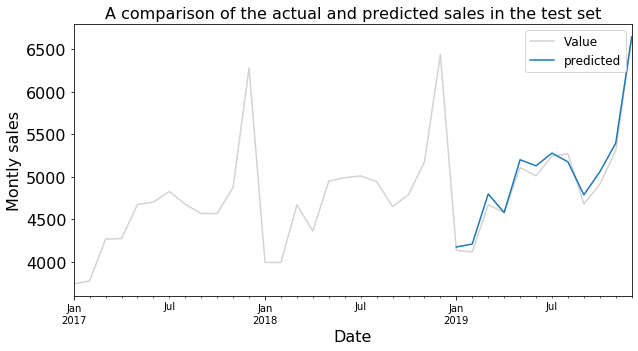

In [30]:
pred = [np.exp(predicted[0]) * train.Value[-1] * train.Value[-12] / train.Value[-13]]

for i in range(1, 12):   
    pred.append(np.exp(predicted[i]) * pred[-1] * train.Value[i-12] / train.Value[i-13])
    
pred_final = pd.Series(pred, index = df[t:].index, name = 'predicted')

pd.concat([test.Value, pred_final.round(1)], axis = 1)

plt.figure(figsize = (10, 5))

df.Value[-36:].plot(color = 'lightgray')

pred_final.plot()

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Montly sales', fontsize = 16)
plt.title('A comparison of the actual and predicted sales in the test set', fontsize = 16)

plt.yticks(fontsize = 16)

plt.legend(fontsize = 12)

plt.show()

In [31]:
RMSE = np.sqrt(mean_squared_error(pred_final, df.Value[t:]))

print('The RMSE is ' + str(RMSE.round(1)) + '.')

The RMSE is 90.9.
